In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [79]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()
data.columns = ['TV','Radio','Newspaper','Sales']

In [80]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

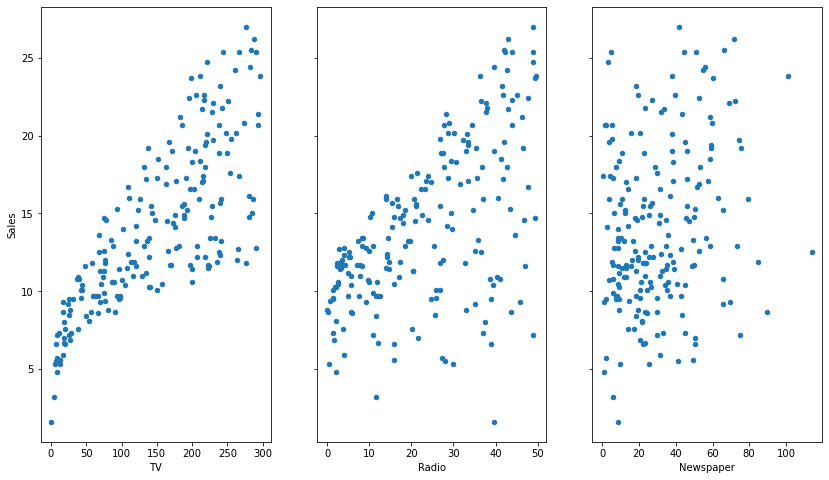

In [81]:
fig,axs = plt.subplots(1,3,sharey = True)
data.plot(kind = 'scatter', x = 'TV', y = 'Sales', ax = axs[0], figsize = (14,8))
data.plot(kind = 'scatter', x = 'Radio', y = 'Sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', ax = axs[2])

In [82]:
feature_cols = 'TV'
x = data[feature_cols].values.reshape(-1, 1)
y = data.Sales.values.reshape(-1, 1)

In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

[7.03259355]
[[0.04753664]]


In [84]:
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [85]:
lm.predict(x_new)

C:\Users\joyde\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[9.40942557]])

In [86]:
x_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [87]:
preds = lm.predict(x_new)
preds

C:\Users\joyde\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 7.0658692 ],
       [21.12245377]])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

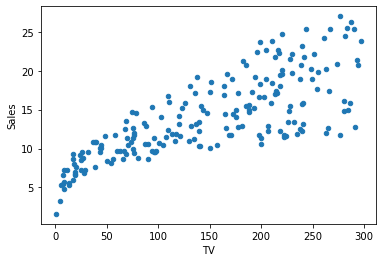

In [90]:
data.plot(kind='scatter', x='TV', y='Sales')

In [91]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [92]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [93]:
lm.rsquared

0.611875050850071

In [94]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales


from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)



In [95]:
lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)


2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [96]:
lm = LinearRegression()
lm.fit(xtrain, ytrain)


print(lm.intercept_)
print(lm.coef_)


predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

2.708949092515912
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [97]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        14:57:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [99]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [100]:
import numpy as np

 
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5


data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [101]:
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [102]:
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

zip(feature_cols, lm.coef_)

In [103]:
np.random.seed(123456)


nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [104]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]


data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [105]:
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales


lm = LinearRegression()
lm.fit(X, y)


print(feature_cols, lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
